Gini Impurity (ناخالصی جینی):

Gini Impurity یک معیار برای اندازه‌گیری چقدر داده‌ها در یک گره (node) درخت تصمیم مخلوط و ناخالص هستند.

Gini = 0 یعنی گره کاملاً خالص است (تمام نمونه‌ها از یک کلاس هستند).

Gini = 1 یعنی گره کاملاً ناخالص است (نمونه‌ها به‌طور یکنواخت در تمام کلاس‌ها توزیع شده‌اند).

محاسبه: به‌طور خلاصه، Gini Impurity را با استفاده از احتمال تعلق هر نمونه به هر کلاس محاسبه می‌کنیم.

Information Gain (دریافت اطلاعات):

Information Gain نشان می‌دهد که تقسیم داده‌ها بر اساس یک ویژگی خاص چقدر به کاهش عدم قطعیت یا آشفتگی در دسته‌بندی داده‌ها کمک می‌کند.

بیشتر Information Gain یعنی ویژگی مورد نظر بیشتر می‌تواند داده‌ها را به دسته‌های مشخص تقسیم کند.

محاسبه: ابتدا آنتروپی (Entropy) داده‌ها را محاسبه کرده، سپس تقسیم داده‌ها بر اساس ویژگی را محاسبه می‌کنیم و Information Gain را از اختلاف این دو بدست می‌آوریم.

تفاوت‌ها:

Gini Impurity بیشتر برای اندازه‌گیری ناخالصی گره‌ها استفاده می‌شود.

Information Gain بیشتر برای انتخاب ویژگی‌هایی که بهترین تقسیم‌بندی را انجام می‌دهند، استفاده می‌شود.

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("heart_cleveland_upload.csv")
X = dataset.iloc[: , :-1]
y = dataset.iloc[: , -1]

df =pd.DataFrame(X)
df["condition"] = y
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [88]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

X_train.shape , X_test.shape

((207, 13), (90, 13))

In [89]:
model =RandomForestClassifier(n_estimators=100 , criterion= "gini" , max_depth=4, random_state=42)

model.fit(X_train , y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train , y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

diff_acc = accuracy_train - accuracy_test
diff_acc

0.15120772946859895

اگر اختلاف بین دقت آموزش و تست زیاد باشد (مثلاً اختلاف‌های بیشتر از 0.1 یا 10 درصد)، می‌تواند نشان‌دهنده overfitting باشد.

Overfitting زمانی اتفاق می‌افتد که مدل به خوبی روی داده‌های آموزش (train) آموزش دیده، اما نتواند به خوبی بر روی داده‌های جدید (test) عمل کند.

این به این معنی است که مدل به ویژگی‌های خاص داده‌های آموزشی بیش از حد حساس شده است و قادر به تعمیم دادن به داده‌های تست نیست.

max_depth=4

بیشتر یا کم تر؟ اورفیتینگ؟؟





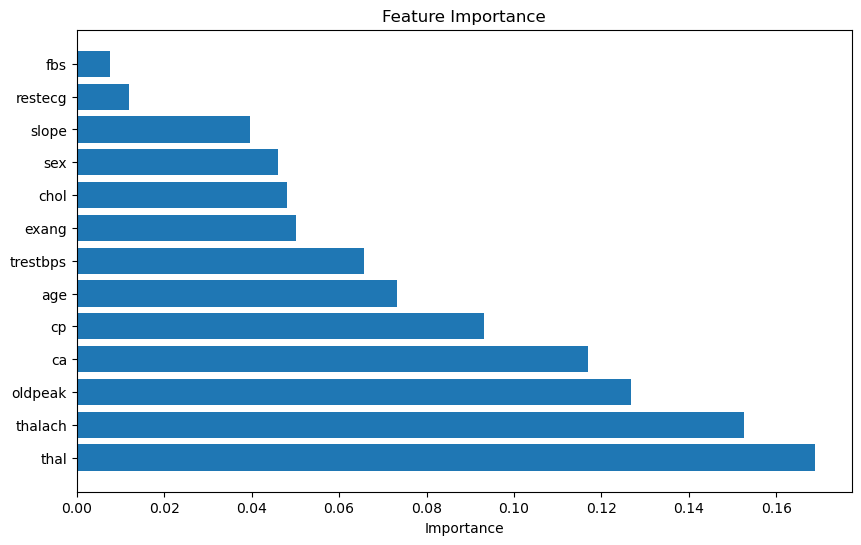

In [90]:
feature_imp =model.feature_importances_

indices = np.argsort(feature_imp)[::-1]
features = df.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), feature_imp[indices], align="center")
plt.yticks(range(X.shape[1]), np.array(features)[indices])
plt.xlabel("Importance")
plt.show()



Random Forest به دلیل استفاده از چندین درخت تصمیم با نمونه‌برداری تصادفی و انتخاب تصادفی ویژگی‌ها، overfitting کمتری نسبت به یک درخت تصمیم دارد. این ویژگی‌ها باعث می‌شوند که مدل به جای یادگیری جزئیات خاص داده‌ها، بتواند الگوهای عمومی‌تری را بیاموزد و عملکرد بهتری روی داده‌های جدید (test) داشته باشد.

Precision نشان می‌دهد که پیش‌بینی‌های مدل برای یک کلاس چقدر درست است.

Recall نشان می‌دهد که از تمام نمونه‌های واقعی یک کلاس چقدر درست شناسایی شده‌اند.

F1-Score ترکیبی از Precision و Recall است که تعادل این دو معیار را بررسی می‌کند

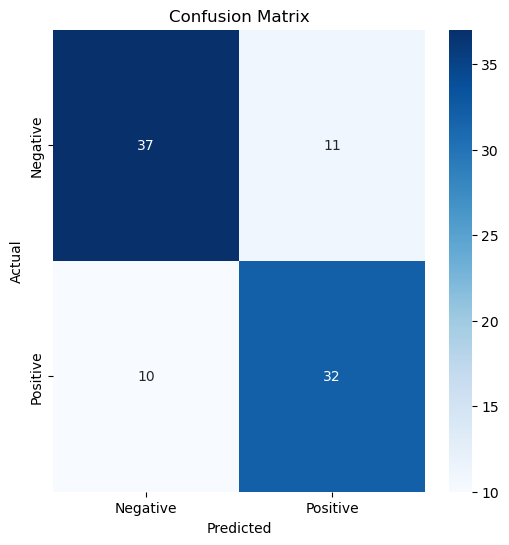

In [91]:
cm = confusion_matrix(y_test , y_test_pred)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


گزارش از تعداد هر یک از این موارد:

True Positives (TP): 32

True Negatives (TN): 37

False Positives (FP): 11

False Negatives (FN): 10

False Negative (FN): در سیستم‌های پزشکی، از دست دادن یک بیمار به این معنی است که مدلی که قرار است بیماری قلبی را شناسایی کند، نمونه‌ای که در واقع بیمار بوده را به اشتباه سالم تشخیص داده است. این اشتباه ممکن است منجر به عدم درمان یا تأخیر در درمان بیماری شود و عواقب جدی برای بیمار به همراه داشته باشد.


ه همین دلیل، سیستم‌های تشخیصی اغلب به گونه‌ای تنظیم می‌شوند که حساسیت بیشتری (Recall بالا) برای شناسایی بیمارانی که در واقع بیمار هستند، داشته باشند،